In [19]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

Support Vector Machine

In [20]:
iris= load_iris()

# sepal length, sepal width
x = iris.data[:100, :2]
y = iris.target[:100]

In [21]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [22]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

In [23]:
# ?? TODO
# hyper plane 초평면
def hyperplane_graph(x_scale, y, svc):
    # y의 값이 0 : 빨강 / 1 : 파랑
    color = ["red" if c == 0 else "blue" for c in y]
    plt.scatter(x_scale[:, 0], x_scale[:, 1], color=color)

    # 초평면
    # w : weight
    # coef_는 변수의 가중치 가져오는거
    w = svc.coef_[0]
    # hx : 최소값 - 1 ~ 최대값 + 1
    hx = np.linspace(int(x_scale.min()) -1, int(x_scale.max()) + 1)
    # a = 기울기
    a = -w[0] / w[1]
    # hy = a(기울기) * x - b(bias)
    hy = a * hx - (svc.intercept_[0]) / w[1]
    plt.plot(hx, hy)

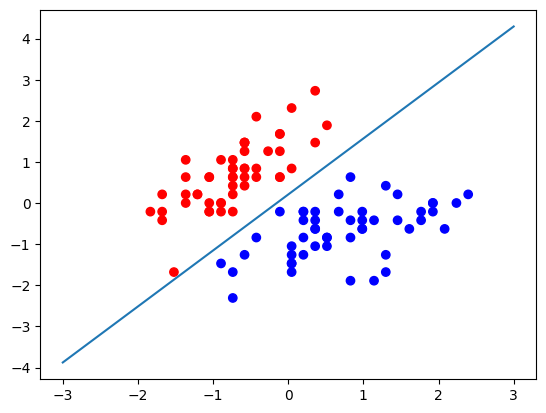

In [24]:
hyperplane_graph(x_scale, y, svc)

In [25]:
# petal length, petal width
x = iris.data[:100, 2:4]
y = iris.target[:100]

In [26]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [27]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

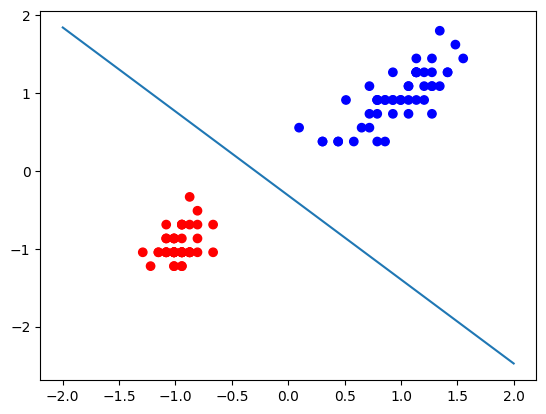

In [28]:
hyperplane_graph(x_scale, y, svc)

In [29]:
x = iris.data[50:, 2:]
y = iris.target[50:] - 1

In [31]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [32]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

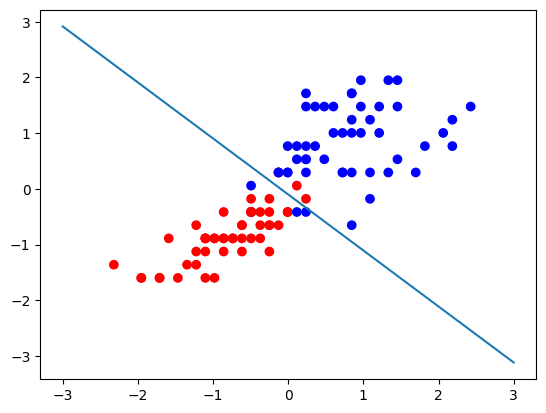

In [33]:
hyperplane_graph(x_scale, y, svc)

SVM (Support Vector Machine) : 선형 식별기 중에 높은 성능을 가진다.
-> 2개의 클래스(y값)가 있는 2차원 뎅이터 Xn으로 클래스 두개를 분류해서 마진을 극대화시킨 후,
    소프트마진 / 하드마진으로 나눈다.

-> 가장 가까운 점들 (Support Vector) 까지의 거리가 멀어지도록 초평면 (결정 경계, hyperplane) 을 결정.

SVM 성능 향상
- 1. 다차원 변수 적용 : 3차원 이상으로 일반화 시켜서 경계를 그린다.

- 2. 비선형 : (선형으로 데이터 분리가 불가능 할 때)

    -> 커널 값에 의한 비선형 경계를 지정

        z축을 추가해서 선형 분리한다. (RBF kernel - Radial Basis Function kernel)